In [13]:
import torch as th
from torch import nn
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from time import time

np.random.seed(42)
th.manual_seed(42)

In [14]:
class NumpyLinearRegression:
    def __init__(self):
        self.weights = None
        
    
    def fit(self, X, y):
        # Go ahead and rock it!
        X = np.column_stack((X, np.ones_like(y)))
        rows, cols = X.shape
    
        self.weights = np.matmul(
            np.matmul(
                np.linalg.inv(
                    np.matmul(
                        np.transpose(X),
                        X)),
                np.transpose(X)),
            y)

    def predict(self, X):
        X = np.column_stack((X, np.ones_like(y)))
        return np.matmul(X, self.weights)

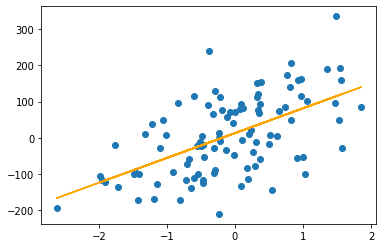

In [15]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=7, bias=1, noise=100)
np_lin_reg = NumpyLinearRegression()
np_lin_reg.fit(X, y)

plt.scatter(X, y)
plt.plot(X, np_lin_reg.predict(X), color='orange')

In [16]:
results_numpy = []

#Let's benchmark it!
for no_samples in no_inputs:
    X, y = make_regression(n_samples=no_samples, n_features=10, n_informative=7, bias=1, noise=100)
    reg = NumpyLinearRegression()
    start = time()    
    reg.fit(X, y)
    end = time()
    results_numpy.append(end - start)

In [17]:
class LinearRegression(nn.Module):
    def __init__(self, device="cpu"):
        self.weights = None
        self.device = device

    def fit(self, X, y):
        # Go ahead and rock it!
        X = X.to(self.device)
        X = X.to(self.device)
        
        X = th.cat([X, th.ones_like(y).to(self.device)], dim=1)

        rows, cols = X.size()
        self.weights = th.matmul(
            th.matmul(
                th.inverse(
                    th.matmul(
                        th.transpose(X, 0, 1),
                        X)),
                th.transpose(X, 0, 1)),
            y)

    def predict(self, X):
        # Write your inference here!
        X = th.cat([X, th.ones((X.size()[0], 1))], dim=1)
        return th.matmul(X, self.weights)

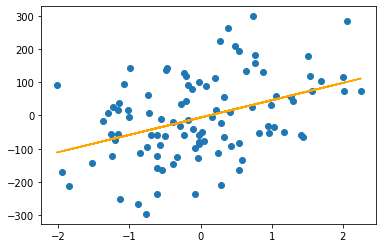

In [20]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=7, bias=1, noise=100)
y = y.reshape((-1, 1))
lin_reg = LinearRegression()
X, y = th.from_numpy(X), th.from_numpy(y)
lin_reg.fit(X, y)

plt.scatter(X, y)
plt.plot(X.numpy(), lin_reg.predict(X), color='orange')

In [35]:
results_torch = {
    "cpu": [],
    "cuda": []
}

for device in ["cpu", "cuda"]:
    if not th.cuda.is_available() and device == "cuda":
        results_torch["cuda"] = [0] * len(no_inputs)
        continue
    
    for no_samples in no_inputs:
        X, y = make_regression(n_samples=no_samples, n_features=10, n_informative=7, bias=1, noise=100)
        y = y.reshape((-1, 1))
        reg = LinearRegression(device=device)
        X, y = th.from_numpy(X).to(device), th.from_numpy(y).to(device)
        start = time()
        reg.fit(X, y)
        end = time()
        results_torch[device].append(end - start)


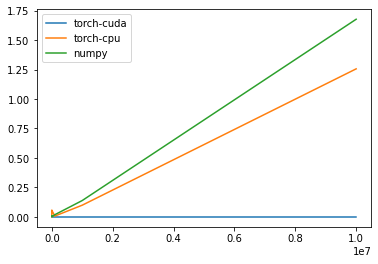

In [36]:
plt.plot(no_inputs, results_torch["cuda"], label="torch-cuda")
plt.plot(no_inputs, results_torch["cpu"], label="torch-cpu")
plt.plot(no_inputs, results_numpy, label="numpy")
plt.legend()